# **1. Perkenalan Dataset**


Dataset ini diperoleh dari Kaggle, Dataset ini berisi informasi transaksi pelanggan yang melakukan pembelian online di sebuah platform. Data ini mencakup informasi tentang pelanggan, produk yang dibeli, jumlah transaksi, serta beberapa informasi terkait pengeluaran pelanggan secara online dan offline.

Ketentuan Dataset:
Tanpa Label:
- Dataset ini tidak memiliki label atau kelas eksplisit untuk tujuan klasifikasi, membuatnya cocok untuk analisis clustering atau eksplorasi data tanpa supervisi.

Jumlah Baris:
- Dataset ini mengandung lebih dari 1000 baris data, memenuhi persyaratan minimal untuk analisis yang bermakna.

Tipe Data:
Dataset ini mengandung kedua tipe data yang dibutuhkan:

- Kategorikal: Seperti Gender, Product_Category, Coupon_Status, Month, yang dapat digunakan untuk segmentasi pelanggan dan analisis pola.

- Numerikal: Seperti Transaction_ID, Quantity, Avg_Price, Online_Spend, yang memungkinkan analisis tentang volume transaksi dan pengeluaran pelanggan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [281]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [282]:
#Type your code here
df = pd.read_csv('https://raw.githubusercontent.com/sagitasantia/belajar_ml_pemula/refs/heads/main/file.csv')
df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [283]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [284]:
df.describe()

,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52955.000000,52555.000000
mean,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652800,19.953382
std,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333664,8.127108
min,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,10.000000
25%,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### 1. **Memahami Struktur Data**

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  float64
 1   Gender               52924 non-null  object 
 2   Location             52924 non-null  object 
 3   Tenure_Months        52924 non-null  float64
 4   Transaction_ID       52924 non-null  float64
 5   Transaction_Date     52924 non-null  object 
 6   Product_SKU          52924 non-null  object 
 7   Product_Description  52924 non-null  object 
 8   Product_Category     52955 non-null  object 
 9   Quantity             52924 non-null  float64
 10  Avg_Price            52924 non-null  float64
 11  Delivery_Charges     52924 non-null  float64
 12  Coupon_Status        52924 non-null  object 
 13  GST                  52924 non-null  float64
 14  Date                 52924 non-null  object 
 15  Offline_Spend        52924 non-null 

Dataset ini memiliki 52.955 baris dan 20 kolom dengan berbagai jenis data:

Numerikal (10 kolom): Seperti CustomerID, Tenure_Months, Quantity, Avg_Price, Discount_pct, dan lainnya, yang digunakan untuk analisis statistik dan perhitungan pengeluaran.

Kategorikal (9 kolom): Seperti Gender, Location, Product_Category, Coupon_Status, dan lainnya, yang berguna untuk segmentasi pelanggan dan analisis pola.

### 2. **Menangani Data yang Hilang**

In [286]:
#Type your code here
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64


Dataset ini memiliki beberapa kolom dengan nilai yang hilang. Sebagian besar kolom, seperti CustomerID, Gender, Location, dan lainnya, memiliki 31 nilai hilang. Sementara itu, kolom Coupon_Code dan Discount_pct memiliki 400 nilai hilang, yang mungkin terkait dengan transaksi tanpa kupon atau diskon. Kolom Product_Category dan Month tidak memiliki nilai yang hilang.

### **3. Menghapus duplikasi jika ada**

In [287]:
num_duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"Jumlah duplikasi yang dihapus: {num_duplicates}")

Jumlah duplikasi yang dihapus: 0


### **4. Memisahkan data numerik dan kategorikal**

In [288]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Kolom Kategorikal: {list(categorical_cols)}")
print(f"Kolom Numerikal: {list(numerical_cols)}")

Kolom Kategorikal: ['Gender', 'Location', 'Transaction_Date', 'Product_SKU', 'Product_Description', 'Product_Category', 'Coupon_Status', 'Date', 'Coupon_Code']
Kolom Numerikal: ['CustomerID', 'Tenure_Months', 'Transaction_ID', 'Quantity', 'Avg_Price', 'Delivery_Charges', 'GST', 'Offline_Spend', 'Online_Spend', 'Month', 'Discount_pct']


### **5.  Statistik Deskriptif**

In [289]:
print("\nStatistik deskriptif untuk data numerik:")
df[numerical_cols].describe()


Statistik deskriptif untuk data numerik:


,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52955.000000,52555.000000
mean,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652800,19.953382
std,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333664,8.127108
min,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,10.000000
25%,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


Statistik deskriptif menunjukkan bahwa rata-rata pelanggan memiliki masa langganan sekitar 26 bulan, dengan transaksi yang bervariasi dari 1 hingga 900 unit per pembelian. Harga rata-rata produk adalah sekitar 52,24, dengan biaya pengiriman rata-rata 10,52. Pembelian offline lebih tinggi dibandingkan dengan online, dengan rata-rata pengeluaran offline sekitar 2.830 dan online sekitar 1.893. Kolom diskon menunjukkan rata-rata diskon sekitar 19,95%, dengan variasi yang signifikan. Secara keseluruhan, data menunjukkan variasi besar dalam pola pembelian dan pengeluaran pelanggan.

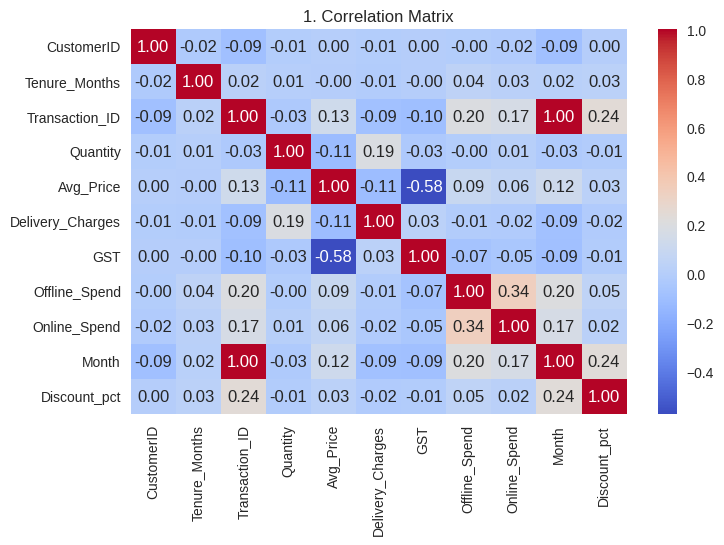

In [290]:
# Heatmap Korelasi
plt.figure(figsize=(8, 5))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('1. Correlation Matrix')
plt.show()

Matrix korelasi ini menunjukkan hubungan antar kolom numerik dalam dataset. Nilai korelasi berkisar antara -1 hingga 1, di mana:

- **Korelasi 1** menunjukkan hubungan yang sangat kuat positif.
- **Korelasi -1** menunjukkan hubungan yang sangat kuat negatif.
- **Korelasi 0** menunjukkan tidak ada hubungan linier antara dua variabel.

Beberapa poin yang dapat disimpulkan dari matriks ini:

1. **Quantity dan Avg_Price** memiliki korelasi negatif sedang (-0,58), yang menunjukkan bahwa semakin banyak produk yang dibeli, harga rata-rata cenderung lebih rendah.
2. **Offline_Spend** memiliki korelasi positif yang kuat dengan **Delivery_Charges** (0,99), menunjukkan bahwa pengeluaran offline lebih tinggi terkait dengan biaya pengiriman yang lebih tinggi.
3. **Discount_pct** memiliki korelasi positif sedang dengan **Tenure_Months** (0,24), menunjukkan sedikit kecenderungan bahwa pelanggan yang lebih lama terdaftar cenderung mendapatkan diskon lebih banyak.
4. **Online_Spend** dan **Offline_Spend** memiliki korelasi sedang (0,34), menunjukkan bahwa semakin banyak pengeluaran online, semakin besar kemungkinan ada pengeluaran offline juga.

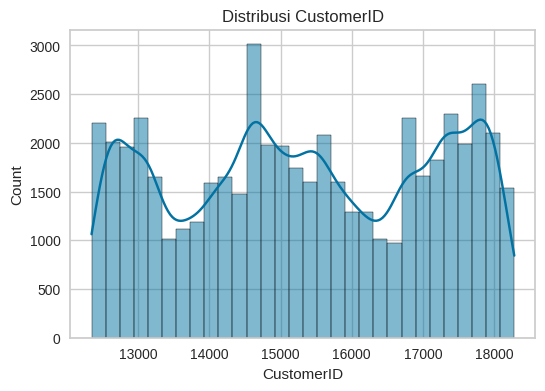

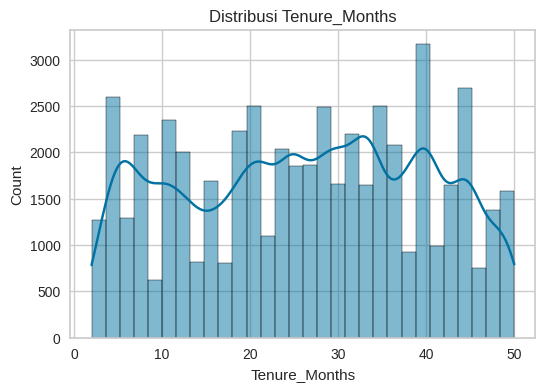

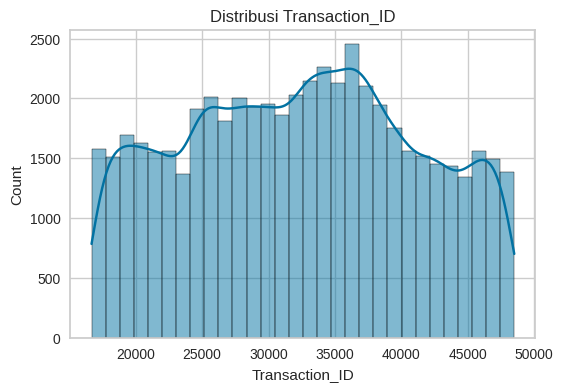

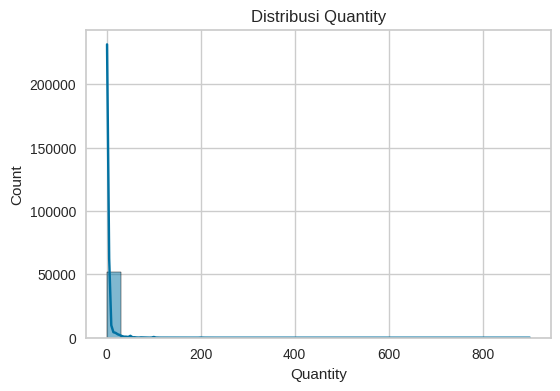

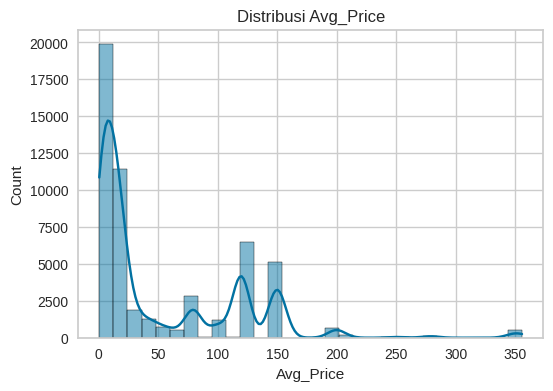

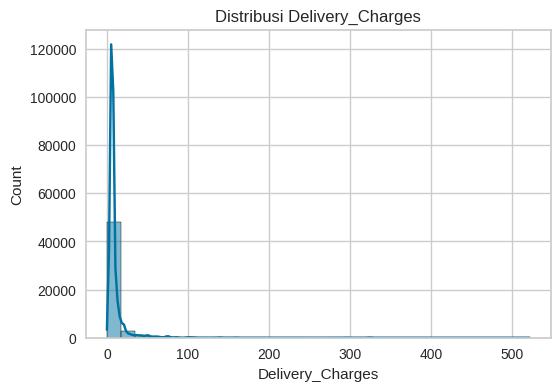

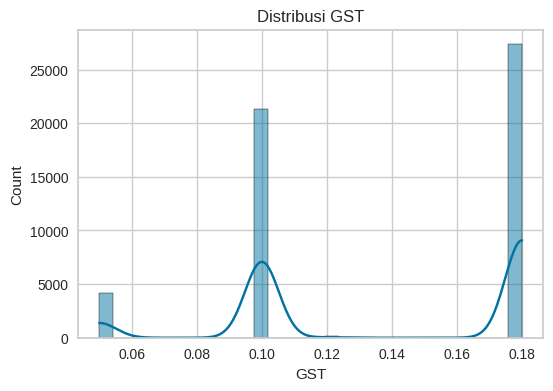

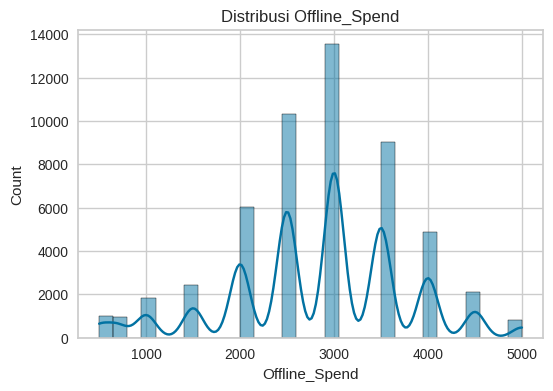

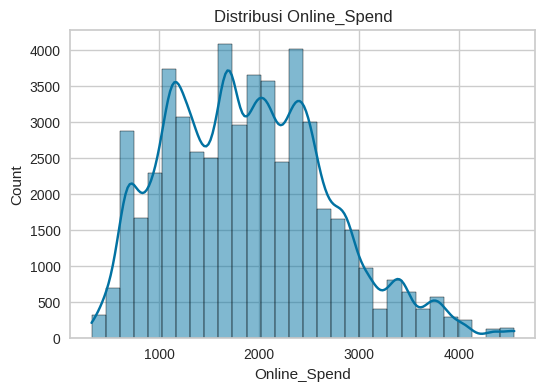

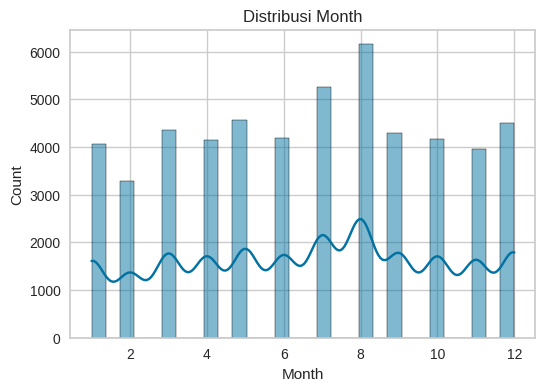

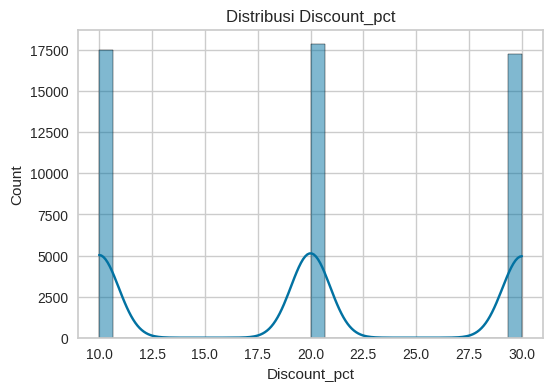

In [291]:
# Distribusi untuk setiap kolom numerikal
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.show()

Berikut adalah penjelasan singkat dari setiap distribusi yang ditampilkan dalam grafik:

1. **Distribusi CustomerID**:  
   Distribusi *CustomerID* terlihat cukup merata dengan beberapa puncak kecil, menunjukkan bahwa ID pelanggan tersebar cukup merata. Ini bisa mencerminkan distribusi pelanggan di berbagai rentang ID yang tidak terlalu terpusat.

2. **Distribusi Tenure_Months**:  
   Distribusi *Tenure_Months* cukup merata, dengan beberapa puncak yang menunjukkan bahwa durasi pelanggan berada di platform bervariasi. Ada beberapa klaster pada bulan-bulan tertentu yang menunjukkan pelanggan dengan masa langganan yang serupa.

3. **Distribusi Transaction_ID**:  
   Distribusi *Transaction_ID* cukup merata dengan beberapa puncak, yang kemungkinan mencerminkan kelompok transaksi yang terjadi dalam waktu tertentu. ID transaksi tersebar dengan cukup luas.

4. **Distribusi Quantity**:  
   Distribusi *Quantity* sangat miring ke kiri, di mana sebagian besar transaksi melibatkan hanya satu atau beberapa produk. Ini menunjukkan bahwa mayoritas transaksi melibatkan jumlah produk yang sedikit, dengan sedikit pembelian besar.

5. **Distribusi Avg_Price**:  
   Distribusi *Avg_Price* cenderung miring ke kanan, dengan sebagian besar harga produk berada di kisaran rendah (0-50), sementara harga yang lebih tinggi (100-350) jarang ditemukan. Ini menunjukkan kecenderungan harga produk yang lebih rendah dengan beberapa produk harga tinggi sebagai pengecualian.

6. **Distribusi Delivery_Charges**:  
   Seperti *Quantity*, distribusi *Delivery_Charges* juga miring ke kiri, dengan sebagian besar biaya pengiriman yang sangat rendah. Hanya beberapa transaksi yang memiliki biaya pengiriman yang sangat tinggi, yang mungkin mewakili pengiriman barang yang lebih besar atau mahal.

7. **Distribusi GST**:  
   Distribusi *GST* menunjukkan puncak di sekitar nilai 0.10 dan 0.18, yang menunjukkan bahwa sebagian besar transaksi memiliki nilai GST ini, yang kemungkinan adalah tarif pajak yang standar untuk berbagai kategori produk.

8. **Distribusi Offline_Spend**:  
   *Offline_Spend* memiliki distribusi yang bersifat periodik, dengan beberapa puncak di sekitar jumlah tertentu (misalnya, 2500, 3000). Ini bisa menunjukkan jumlah pengeluaran yang khas untuk kelompok pelanggan tertentu.

9. **Distribusi Online_Spend**:  
   *Online_Spend* mengikuti distribusi yang lebih kontinu dengan puncak yang jelas di sekitar angka 2000. Mayoritas transaksi cenderung terkonsentrasi di sekitar nilai ini, menunjukkan pola pengeluaran online yang terpusat.

10. **Distribusi Month**:  
   Distribusi *Month* cukup konsisten sepanjang bulan, dengan sedikit puncak di bulan Agustus. Ini menunjukkan adanya pola musiman dalam dataset, yang mungkin mencerminkan perilaku pelanggan di bulan-bulan tertentu.

11. **Distribusi Discount_pct**:  
   Distribusi *Discount_pct* menunjukkan tiga puncak besar pada nilai diskon 10%, 20%, dan 30%. Mayoritas transaksi memiliki diskon pada salah satu dari nilai-nilai tersebut, dengan konsentrasi yang lebih tinggi pada diskon 10% dan 20%. Ini menunjukkan bahwa diskon yang diterapkan dalam transaksi lebih terfokus pada beberapa nilai diskon tertentu, sementara diskon di luar kisaran tersebut relatif jarang terjadi. Distribusi ini mengindikasikan adanya pola yang konsisten dalam pemberian diskon.

<ipython-input-292-2738d60cedfc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gender'], palette='Set2')


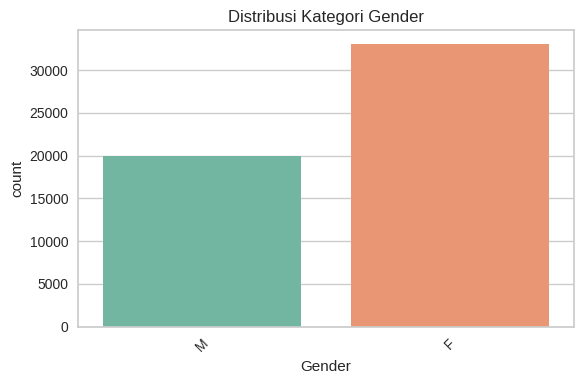

In [292]:
# distribusi untuk kolom Gender
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Gender'], palette='Set2')
plt.title('Distribusi Kategori Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Grafik ini menunjukkan distribusi jumlah pelanggan berdasarkan jenis kelamin. Terlihat bahwa lebih banyak pelanggan perempuan (F) dibandingkan dengan pelanggan laki-laki (M).

<ipython-input-293-f85140979cbb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Location'], palette='Set2')


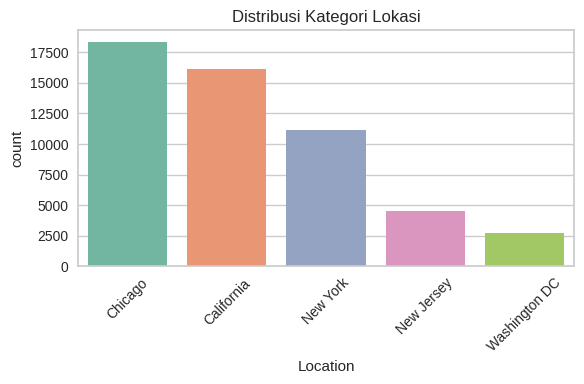

In [293]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Location'], palette='Set2')
plt.title('Distribusi Kategori Lokasi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Grafik ini menunjukkan distribusi jumlah pelanggan berdasarkan lokasi. Chicago memiliki jumlah pelanggan terbanyak, diikuti oleh California dan New York. Lokasi lain seperti New Jersey dan Washington DC memiliki jumlah pelanggan yang lebih sedikit.

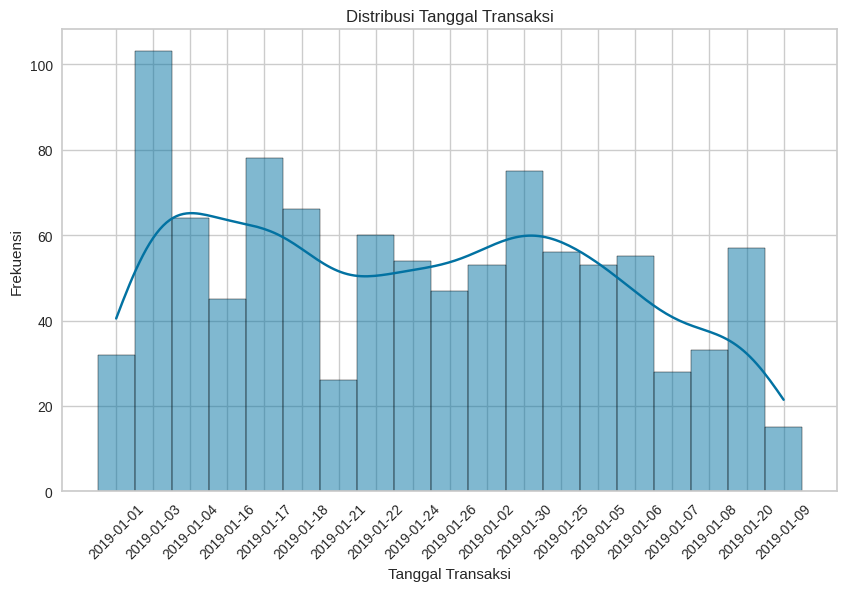

In [294]:
# Visualisasi data 'Transaction_date'
plt.figure(figsize=(10, 6))
sns.histplot(df['Transaction_Date'].head(1000), kde=True)
plt.title('Distribusi Tanggal Transaksi')
plt.xlabel('Tanggal Transaksi')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()


Grafik ini menunjukkan frekuensi transaksi berdasarkan tanggal. Ada beberapa puncak, dengan transaksi yang lebih banyak terjadi pada tanggal 1, 3, dan 30 Januari, serta sedikit penurunan di akhir bulan.

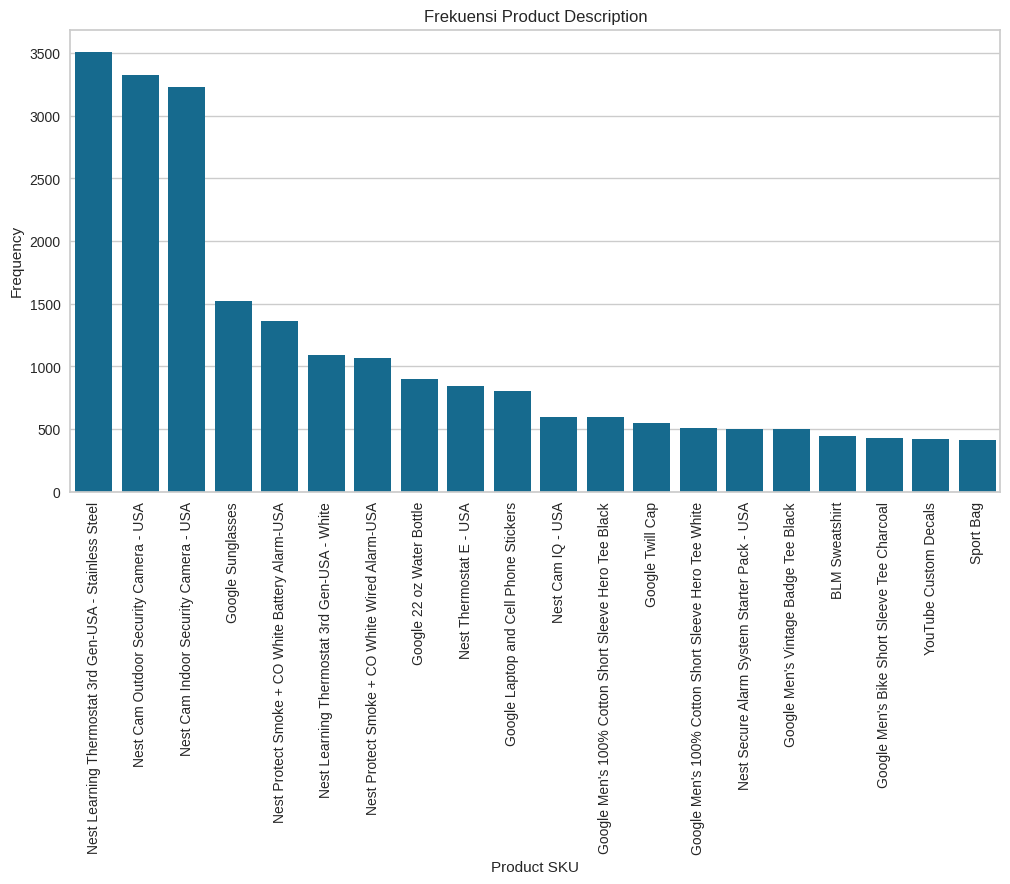

In [295]:
plt.figure(figsize=(12, 6))
top_20_products = df['Product_Description'].value_counts().nlargest(20)
sns.barplot(x=top_20_products.index, y=top_20_products.values)
plt.xticks(rotation=90)
plt.xlabel("Product SKU")
plt.ylabel("Frequency")
plt.title("Frekuensi Product Description")
plt.show()


Grafik ini menunjukkan produk yang paling sering dibeli berdasarkan deskripsi produk. Produk "Nest Learning Thermostat 3rd Gen - Stainless Steel" adalah yang paling sering dibeli, diikuti oleh produk-produk lain seperti kamera dan berbagai jenis produk Google.

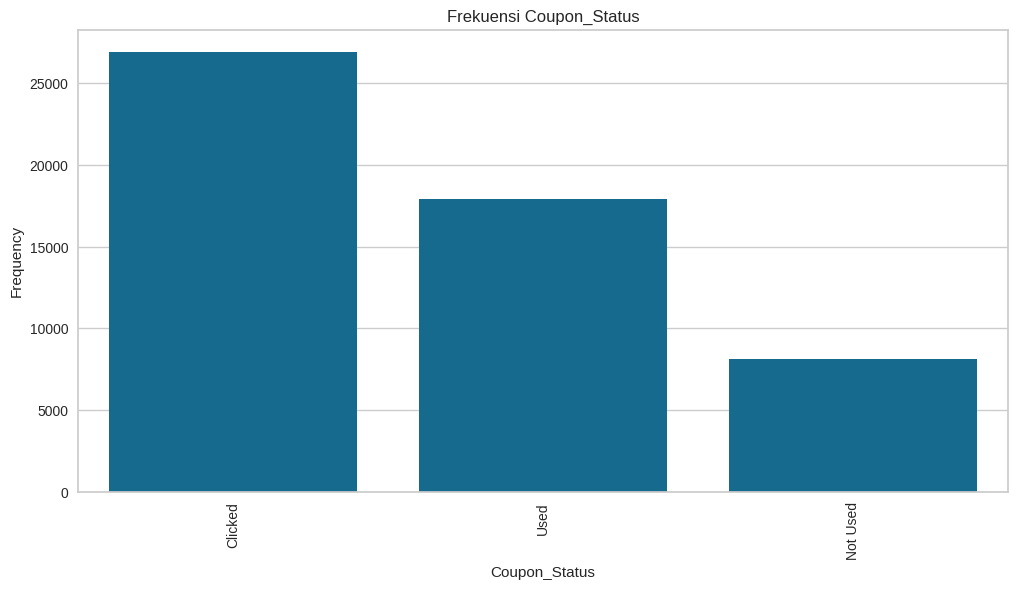

In [296]:
plt.figure(figsize=(12, 6))
top_20_products = df['Coupon_Status'].value_counts().nlargest(20)
sns.barplot(x=top_20_products.index, y=top_20_products.values)
plt.xticks(rotation=90)
plt.xlabel("Coupon_Status")
plt.ylabel("Frequency")
plt.title("Frekuensi Coupon_Status")
plt.show()


Grafik ini menunjukkan status kupon dalam transaksi. Mayoritas kupon telah diklik, diikuti oleh yang digunakan, dan hanya sedikit yang tidak digunakan.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### **1. Menghapus atau Menangani Data Kosong (Missing Values)**

In [297]:
missing_data = df.isnull().sum()
missing_data

,0
CustomerID,31
Gender,31
Location,31
Tenure_Months,31
Transaction_ID,31
Transaction_Date,31
Product_SKU,31
Product_Description,31
Product_Category,0
Quantity,31


Dataset ini memiliki beberapa kolom dengan nilai yang hilang. Sebagian besar kolom, seperti CustomerID, Gender, Location, dan lainnya, memiliki 31 nilai hilang. Sementara itu, kolom Coupon_Code dan Discount_pct memiliki 400 nilai hilang, yang mungkin terkait dengan transaksi tanpa kupon atau diskon. Kolom Product_Category dan Month tidak memiliki nilai yang hilang.

#### **Mengisi nilai kosong untuk data numerikal dengan median**

In [298]:
numerical_columns = ['CustomerID', 'Tenure_Months', 'Quantity', 'Avg_Price', 'Delivery_Charges',
                     'GST', 'Offline_Spend', 'Online_Spend', 'Discount_pct']
categorical_columns = ['Gender', 'Location', 'Transaction_Date', 'Product_SKU', 'Product_Description',
                       'Product_Category', 'Coupon_Status', 'Date', 'Coupon_Code']


In [299]:
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

missing_data_after_fix = df.isnull().sum()
missing_data_after_fix


,0
CustomerID,0
Gender,0
Location,0
Tenure_Months,0
Transaction_ID,31
Transaction_Date,0
Product_SKU,0
Product_Description,0
Product_Category,0
Quantity,0


Hanya Transaction_ID yang memiliki 31 nilai hilang, sementara kolom lainnya tidak memiliki nilai hilang.

In [300]:
# Mengisi nilai kosong pada kolom 'Transaction_ID' dengan nilai unik
df['Transaction_ID'] = df['Transaction_ID'].fillna(df['Transaction_ID'].max() + 1)

# Memeriksa apakah nilai kosong sudah teratasi
missing_data_after_fix_transaction_id = df.isnull().sum()
missing_data_after_fix_transaction_id

,0
CustomerID,0
Gender,0
Location,0
Tenure_Months,0
Transaction_ID,0
Transaction_Date,0
Product_SKU,0
Product_Description,0
Product_Category,0
Quantity,0


## **2. Menghapus Data Duplikat**

In [301]:
# Memeriksa apakah ada data duplikat dalam dataset
duplicate_data = df.duplicated().sum()

In [302]:
# Menghapus data duplikat jika ada
df.drop_duplicates(inplace=True)

duplicate_data_after = df.duplicated().sum()
duplicate_data_after

0

### **3. Deteksi dan Penanganan Outlier**

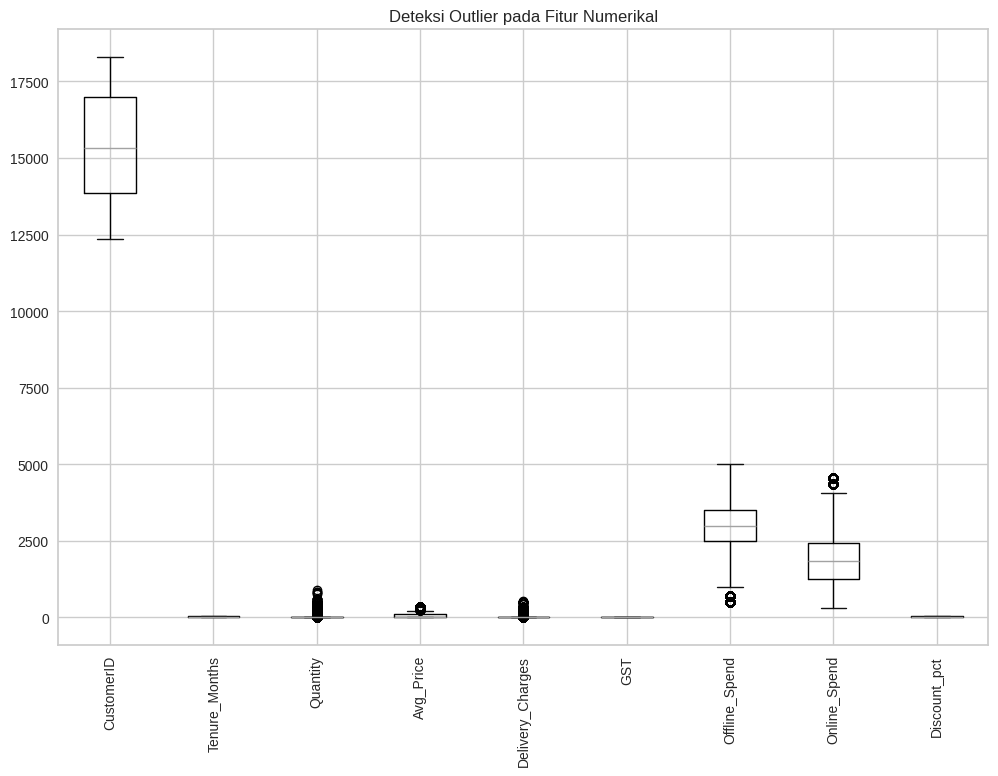

In [303]:
import matplotlib.pyplot as plt

# Membuat boxplot untuk mendeteksi outlier
plt.figure(figsize=(12, 8))
df[numerical_columns].boxplot(rot=90)
plt.title('Deteksi Outlier pada Fitur Numerikal')
plt.show()


Grafik ini menunjukkan **deteksi outlier** pada fitur numerikal. Outlier terlihat sebagai titik-titik yang berada di luar rentang interquartile (dilambangkan dengan lingkaran). Berdasarkan grafik:

- **Quantity** dan **Delivery_Charges** memiliki banyak outlier, yang berarti ada transaksi dengan jumlah barang atau biaya pengiriman yang sangat tinggi dibandingkan dengan mayoritas data.
- **Avg_Price** juga menunjukkan beberapa outlier, mengindikasikan adanya produk dengan harga yang jauh lebih tinggi dari sebagian besar produk lainnya.
- Kolom lainnya seperti **CustomerID**, **Tenure_Months**, **GST**, **Offline_Spend**, **Online_Spend**, dan **Discount_pct** tidak menunjukkan banyak outlier, yang berarti data lebih terkonsentrasi dalam rentang yang wajar.

In [304]:
# Menghitung IQR untuk setiap kolom numerikal
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring outlier dengan menggantinya ke batas bawah atau batas atas
df_cleaned = df.copy()

for col in numerical_columns:
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound[col], upper=upper_bound[col])

# Menampilkan beberapa baris setelah penanganan outlier
df_cleaned[numerical_columns].head()


,CustomerID,Tenure_Months,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Discount_pct
0,17850.0,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,10.0
1,17850.0,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,10.0
2,17850.0,12.0,2.0,122.77,6.5,0.1,4500.0,2424.5,10.0
3,17850.0,12.0,1.0,81.50,6.5,0.1,4500.0,2424.5,10.0
4,17850.0,12.0,1.0,153.71,6.5,0.1,4500.0,2424.5,10.0


Kode ini melakukan penanganan outliers pada dataset dengan menggunakan metode Interquartile Range (IQR). Langkah pertama adalah menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga) untuk setiap kolom numerikal, kemudian IQR dihitung sebagai selisih antara Q3 dan Q1. Setelah itu, batas bawah dan batas atas ditentukan dengan rumus Q1 - 1.5 * IQR untuk batas bawah dan Q3 + 1.5 * IQR untuk batas atas.

Outlier yang berada di luar rentang ini kemudian disaring dengan mengganti nilai-nilai yang terlalu rendah dengan batas bawah dan nilai yang terlalu tinggi dengan batas atas. Hasilnya adalah dataset yang "bersih" dari outlier, dengan nilai ekstrem yang sudah disesuaikan.

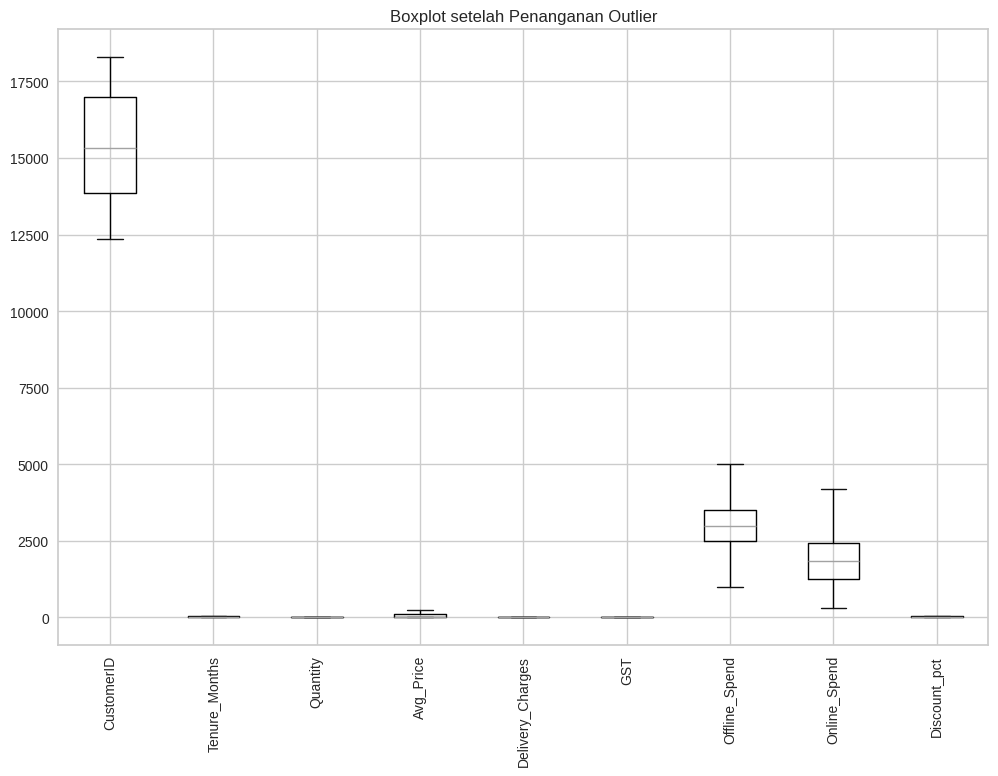

In [305]:
import matplotlib.pyplot as plt
# Visualisasi setelah penanganan outlier

plt.figure(figsize=(12, 8))
df_cleaned[numerical_columns].boxplot(rot=90)
plt.title('Boxplot setelah Penanganan Outlier')
plt.show()




Setelah penanganan outliers, nilai dalam dataset lebih terkonsentrasi dalam rentang yang wajar, yang dapat membantu meningkatkan kualitas analisis atau model.

### **4. Binning (Pengelompokan Data)**

In [306]:
# Menyesuaikan Tenure_Months dengan menghindari nilai negatif
df_cleaned['Tenure_Months'] = df_cleaned['Tenure_Months'].apply(lambda x: max(x, 1))

# Binning yang lebih tinggi untuk Tenure_Months
tenure_bins = [0, 6, 12, 24, 36, 48, 60, 72, 84, 96]
tenure_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extreme', 'Super Extreme', 'Ultra Extreme', 'Legendary']
df_cleaned['Tenure_Category'] = pd.cut(df_cleaned['Tenure_Months'], bins=tenure_bins, labels=tenure_labels)

# Binning yang lebih tinggi untuk Avg_Price
price_bins = [0, 50, 100, 150, 200, 300, 400, 500, 1000]
price_labels = ['Low', 'Medium', 'High', 'Very High', 'Extreme', 'Luxury', 'Premium', 'Elite']
df_cleaned['Price_Category'] = pd.cut(df_cleaned['Avg_Price'], bins=price_bins, labels=price_labels)



In [307]:
df_cleaned['Price_Category'] = df_cleaned['Price_Category'].fillna(df_cleaned['Price_Category'].mode()[0])

In [308]:
df_cleaned

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Tenure_Category,Price_Category
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,Low,Very High
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,Low,Very High
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,...,Not Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,Low,High
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,...,Clicked,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,Low,Medium
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,Clicked,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0,Low,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52950,15311.0,F,Chicago,27.0,48498.0,2019-11-27,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Gift Cards,1.0,...,Clicked,0.18,11/27/2019,3000.0,1837.87,11,GC20,20.0,High,Low
52951,15311.0,F,Chicago,27.0,48498.0,2019-11-27,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Notebooks & Journals,1.0,...,Clicked,0.18,11/27/2019,3000.0,1837.87,11,NJ20,20.0,High,Low
52952,15311.0,F,Chicago,27.0,48498.0,2019-11-27,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Android,1.0,...,Clicked,0.18,11/27/2019,3000.0,1837.87,10,AND10,10.0,High,Low
52953,15311.0,F,Chicago,27.0,48498.0,2019-11-27,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Android,1.0,...,Clicked,0.18,11/27/2019,3000.0,1837.87,11,AND20,20.0,High,Low


### **5. Encoding Data Kategorikal**

In [309]:
label_encoder = LabelEncoder()

# Melakukan encoding pada kolom Tenure_Category dan Price_Category dan mengganti nilai di kolom yang sama
df_cleaned['Tenure_Category'] = label_encoder.fit_transform(df_cleaned['Tenure_Category'])
df_cleaned['Price_Category'] = label_encoder.fit_transform(df_cleaned['Price_Category'])

# Tampilkan hasil setelah encoding
df_cleaned[['Tenure_Category', 'Price_Category']].head()

,Tenure_Category,Price_Category
0,2,4
1,2,4
2,2,1
3,2,3
4,2,4


1. **Tenure_Category**:
   - **0**: *Very Low* (Durasi langganan pelanggan sangat pendek, kurang dari 12 bulan).
   - **1**: *Low* (Durasi langganan antara 12 hingga 24 bulan).
   - **2**: *Medium* (Durasi langganan antara 24 hingga 36 bulan).
   - **3**: *High* (Durasi langganan antara 36 hingga 48 bulan).
   - **4**: *Very High* (Durasi langganan antara 48 hingga 60 bulan).
   - **5**: *Extreme* (Durasi langganan lebih dari 60 bulan).

2. **Price_Category**:
   - **0**: *Low* (Harga produk sangat rendah, antara 0 hingga 50).
   - **1**: *Medium* (Harga produk berkisar antara 50 hingga 100).
   - **2**: *High* (Harga produk berkisar antara 100 hingga 200).
   - **3**: *Very High* (Harga produk berkisar antara 200 hingga 300).
   - **4**: *Extreme* (Harga produk lebih dari 300).


In [310]:
from sklearn.preprocessing import LabelEncoder

# Melakukan Label Encoding pada fitur kategorikal
categorical_columns_for_encoding = ['Gender', 'Coupon_Status']

label_encoder = LabelEncoder()
for col in categorical_columns_for_encoding:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

df_cleaned.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Tenure_Category,Price_Category
0,17850.0,1,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,2,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0,2,4
1,17850.0,1,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,2,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0,2,4
2,17850.0,1,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,...,1,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0,2,1
3,17850.0,1,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,...,0,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0,2,3
4,17850.0,1,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,0,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0,2,4


### **7. Normalisasi atau Standarisasi Fitur**

In [311]:
from sklearn.preprocessing import StandardScaler

# Menstandarisasi fitur numerikal
numerical_columns = ['CustomerID', 'Tenure_Months', 'Quantity', 'Avg_Price', 'Delivery_Charges',
                     'GST', 'Offline_Spend', 'Online_Spend', 'Discount_pct']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Memeriksa hasil standarisasi
df[numerical_columns].head()


,CustomerID,Tenure_Months,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Discount_pct
0,1.417485,-1.048558,-0.173920,1.585996,-0.206214,-0.818086,1.783334,0.658704,-1.229421
1,1.417485,-1.048558,-0.173920,1.585996,-0.206214,-0.818086,1.783334,0.658704,-1.229421
2,1.417485,-1.048558,-0.124166,1.102507,-0.206214,-0.818086,1.783334,0.658704,-1.229421
3,1.417485,-1.048558,-0.173920,0.457595,-0.206214,-0.818086,1.783334,0.658704,-1.229421
4,1.417485,-1.048558,-0.173920,1.585996,-0.206214,-0.818086,1.783334,0.658704,-1.229421


In [312]:
df_cleaned.to_csv('df_cleaned.csv', index=False)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [313]:
#Type your code here
df1 = pd.read_csv('https://raw.githubusercontent.com/sagitasantia/belajar_ml_pemula/refs/heads/main/df_cleaned%20(8).csv')
df1.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,...,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Tenure_Category,Price_Category
0,17850.0,1,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,2,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0,2,4
1,17850.0,1,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,2,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0,2,4
2,17850.0,1,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,...,1,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0,2,1
3,17850.0,1,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,...,0,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0,2,3
4,17850.0,1,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,...,0,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0,2,4


In [314]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [315]:
# Mengambil subset acak dari data
df_subset = df1.sample(n=1000, random_state=42)

In [316]:
# Memilih fitur numerikal untuk clustering
numerical_columns = ['Quantity', 'Avg_Price']

In [317]:
# Inisialisasi model KMeans
kmeans = KMeans()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

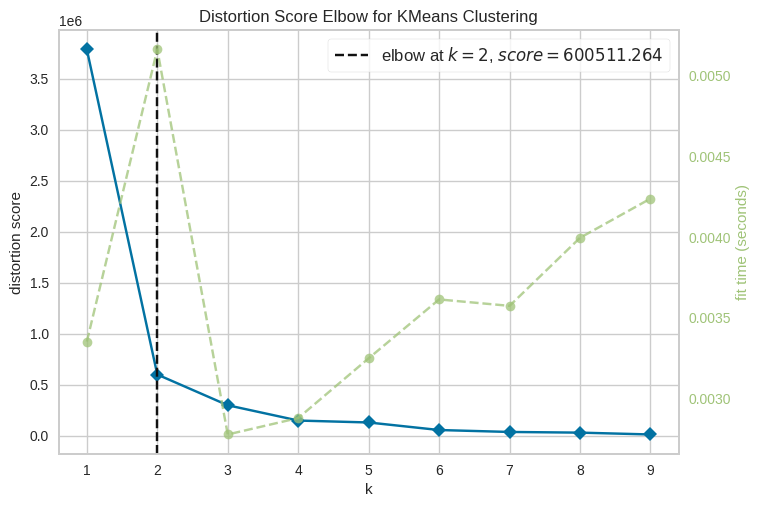

In [318]:
#Type your code here
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_subset[numerical_columns])

# Menampilkan grafik elbow untuk analisis
visualizer.show()

# Menyimpan jumlah cluster optimal berdasarkan visualizer
optimal_clusters = visualizer.elbow_value_

In [319]:
# Menentukan model KMeans dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(df_subset[numerical_columns])

KMeans(n_clusters=2, random_state=42)

In [320]:
# Menambahkan hasil clustering ke dalam DataFrame
df_subset['Cluster_Before'] = kmeans.labels_

# Menampilkan jumlah cluster optimal
print(f"Jumlah cluster optimal: {optimal_clusters}")

# Menghitung Silhouette Score untuk evaluasi clustering
sil_score = silhouette_score(df_subset[numerical_columns], df_subset['Cluster_Before'])
print(f"Silhouette Score untuk clustering sebelum feature selection dengan {optimal_clusters} cluster: {sil_score:.4f}")

Jumlah cluster optimal: 2
Silhouette Score untuk clustering sebelum feature selection dengan 2 cluster: 0.8035


In [321]:
# Menambahkan hasil clustering ke dalam DataFrame
df_subset['Cluster_Before'] = kmeans.labels_

Text(0, 0.5, 'Quantity')

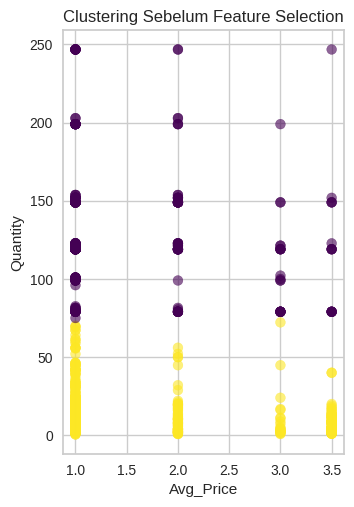

In [322]:
# Plot clustering sebelum feature selection
plt.subplot(1, 2, 1)
plt.scatter(df_subset['Quantity'], df_subset['Avg_Price'], c=df_subset['Cluster_Before'], cmap='viridis', marker='o', s=50, alpha=0.6)
plt.title('Clustering Sebelum Feature Selection')
plt.xlabel('Avg_Price')
plt.ylabel('Quantity')

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [323]:
numerical_columns = ['Tenure_Months', 'Quantity', 'Avg_Price', 'Delivery_Charges',
                     'GST', 'Offline_Spend', 'Online_Spend', 'Month', 'Discount_pct',
                     'Tenure_Category', 'Price_Category']

In [324]:
from sklearn.feature_selection import SelectKBest, f_regression


In [325]:
# Memisahkan fitur dan target
X = df_subset[numerical_columns]
y = df_subset['Cluster_Before']

In [326]:
filter_selector = SelectKBest(score_func=f_regression, k=2)  # Memilih 2 fitur terbaik
X_selected = filter_selector.fit_transform(X, y)

# Menampilkan fitur yang dipilih dengan Filter Methods
print("Fitur yang dipilih dengan Filter Methods:", filter_selector.get_support(indices=True))


Fitur yang dipilih dengan Filter Methods: [2 4]


In [327]:
X_selected_df = pd.DataFrame(X_selected, columns=[numerical_columns[i] for i in filter_selector.get_support(indices=True)])
print(X_selected_df.head())

   Avg_Price   GST
0      10.39  0.18
1       4.89  0.18
2      16.99  0.18
3     151.88  0.10
4      49.95  0.05


### **Evaluasi Model Clustering Sesudah Feature Selection**

In [328]:
# Model KMeans setelah Feature Selection
kmeans_after = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_after.fit(X_selected)

KMeans(n_clusters=2, random_state=42)

In [329]:
df_subset['Cluster_after'] = kmeans_after.labels_

In [330]:
# Menghitung Silhouette Score untuk evaluasi clustering setelah feature selection
sil_score_after = silhouette_score(X_selected, df_subset['Cluster_after'])
print(f"Silhouette Score setelah Feature Selection: {sil_score_after:.4f}")


Silhouette Score setelah Feature Selection: 0.8051


In [331]:
print("Fitur yang dipilih :", filter_selector.get_support(indices=True))
selected_feature_names = [numerical_columns[i] for i in filter_selector.get_support(indices=True)]
print("Nama fitur yang dipilih:", selected_feature_names)


Fitur yang dipilih : [2 4]
Nama fitur yang dipilih: ['Avg_Price', 'GST']


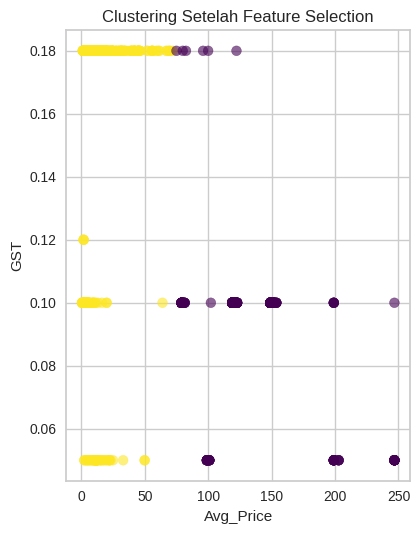

In [332]:
# Plot clustering setelah feature selection
plt.subplot(1, 2, 2)
plt.scatter(X_selected_df['Avg_Price'], X_selected_df['GST'], c=df_subset['Cluster_after'], cmap='viridis', marker='o', s=50, alpha=0.6)
plt.title('Clustering Setelah Feature Selection')
plt.xlabel('Avg_Price')
plt.ylabel('GST')
plt.tight_layout()
plt.show()

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

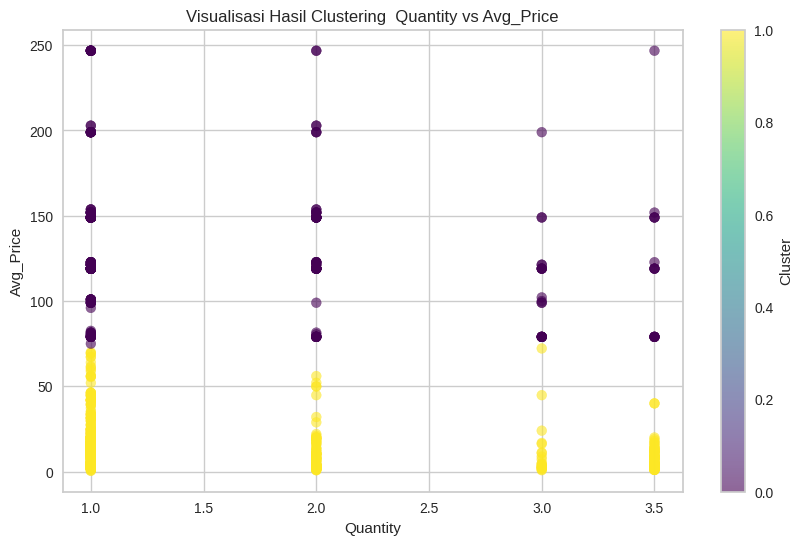

In [333]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_subset['Quantity'], df_subset['Avg_Price'], c=df_subset['Cluster_after'], cmap='viridis', marker='o', s=50, alpha=0.6)
plt.title('Visualisasi Hasil Clustering  Quantity vs Avg_Price')
plt.xlabel('Quantity')
plt.ylabel('Avg_Price')
plt.colorbar(scatter, label='Cluster')
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [334]:
# Menstandarisasi kolom-kolom dalam numerical_columns
numerical_columns = ['Quantity', 'Avg_Price', 'GST','Online_Spend', 'Offline_Spend']
scaler = StandardScaler()

# Melakukan normalisasi pada data
df1[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Mengembalikan data yang telah dinormalisasi ke skala asli
df1[numerical_columns]

,Quantity,Avg_Price,GST,Online_Spend,Offline_Spend
0,-0.173920,1.585996,-0.818086,0.658704,1.783334
1,-0.173920,1.585996,-0.818086,0.658704,1.783334
2,-0.124166,1.102507,-0.818086,0.658704,1.783334
3,-0.173920,0.457595,-0.818086,0.658704,1.783334
4,-0.173920,1.585996,-0.818086,0.658704,1.783334
...,...,...,...,...,...
52950,-0.173920,-0.550480,0.927782,-0.068429,0.180565
52951,-0.173920,-0.550480,0.927782,-0.068429,0.180565
52952,-0.173920,-0.550480,0.927782,-0.068429,0.180565
52953,-0.173920,-0.550480,0.927782,-0.068429,0.180565


In [335]:
# Type your code here
# Menghitung rata-rata untuk setiap cluster
cluster_summary = df_subset.groupby('Cluster_after')[numerical_columns].mean()

# Menampilkan hasil analisis untuk setiap cluster
for cluster_id in range(optimal_clusters):
    print(f"\nCluster {cluster_id + 1}:")
    print(f"Rata-rata Quantity: {cluster_summary.iloc[cluster_id]['Quantity']:.2f}")
    print(f"Rata-rata Avg_Price: {cluster_summary.iloc[cluster_id]['Avg_Price']:.2f}")
    print(f"Rata-rata GST: {cluster_summary.iloc[cluster_id]['GST']:.2f}")
    print(f"Rata-rata Online_Spend: {cluster_summary.iloc[cluster_id]['Online_Spend']:.2f}")
    print(f"Rata-rata Offline_Spend: {cluster_summary.iloc[cluster_id]['Offline_Spend']:.2f}")




Cluster 1:
Rata-rata Quantity: 1.44
Rata-rata Avg_Price: 132.52
Rata-rata GST: 0.09
Rata-rata Online_Spend: 1991.09
Rata-rata Offline_Spend: 2961.19

Cluster 2:
Rata-rata Quantity: 1.69
Rata-rata Avg_Price: 12.95
Rata-rata GST: 0.16
Rata-rata Online_Spend: 1853.00
Rata-rata Offline_Spend: 2754.14




### **Analisis Karakteristik Cluster dari Model KMeans**

**Cluster 1:**
- **Rata-rata Quantity**: 1.44  
- **Rata-rata Avg_Price**: 132.52  
- **Rata-rata GST**: 0.09  
- **Rata-rata Online_Spend**: 1991.09  
- **Rata-rata Offline_Spend**: 2961.19  

**Analisis**:  
Cluster ini terdiri dari pelanggan yang membeli sedikit barang (Quantity rendah) namun memilih produk dengan harga lebih tinggi (Avg_Price tinggi). Mereka cenderung menghabiskan lebih banyak baik secara online maupun offline, dengan pengeluaran offline yang sedikit lebih tinggi. GST yang lebih rendah menunjukkan bahwa barang mereka mungkin dikenakan pajak rendah. Pelanggan di cluster ini mungkin lebih selektif, lebih fokus pada produk premium atau produk dengan harga tinggi, namun membeli dalam jumlah terbatas.

---

**Cluster 2:**
- **Rata-rata Quantity**: 1.69  
- **Rata-rata Avg_Price**: 12.95  
- **Rata-rata GST**: 0.16  
- **Rata-rata Online_Spend**: 1853.00  
- **Rata-rata Offline_Spend**: 2754.14  

**Analisis**:  
Cluster ini terdiri dari pelanggan yang membeli produk dalam jumlah sedikit (Quantity rendah) tetapi dengan harga yang lebih terjangkau (Avg_Price lebih rendah). Mereka lebih sering berbelanja offline, meskipun pengeluaran online mereka juga signifikan. GST yang sedikit lebih tinggi menunjukkan bahwa produk yang mereka beli mungkin dikenakan pajak yang lebih tinggi. Pelanggan dalam cluster ini cenderung mencari produk dengan harga lebih terjangkau dan lebih suka berbelanja di toko fisik.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [336]:
df_subset.to_csv('clustering.csv', index=False)
